In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/FIFA_train.csv')
data

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [18]:
data['star_x'] = (data['stat_overall'] + data['stat_potential']) / data['age']
data

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,star_x
0,0,L. Messi,31,south america,2021,0,left,5.0,94,94,4.0,110500000.0,6.064516
1,3,De Gea,27,europe,2020,0,right,4.0,91,93,1.0,72000000.0,6.814815
2,7,L. Suárez,31,south america,2021,0,right,5.0,91,91,3.0,80000000.0,5.870968
3,8,Sergio Ramos,32,europe,2020,1,right,4.0,91,91,3.0,51000000.0,5.687500
4,9,J. Oblak,25,europe,2021,0,right,3.0,90,93,1.0,68000000.0,7.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,1,right,1.0,48,63,3.0,60000.0,6.166667
8928,16936,C. Ehlich,19,europe,2020,1,right,1.0,47,59,2.0,40000.0,5.578947
8929,16941,N. Fuentes,18,south america,2021,1,right,1.0,47,64,2.0,50000.0,6.166667
8930,16942,J. Milli,18,europe,2021,0,right,1.0,47,65,1.0,50000.0,6.222222


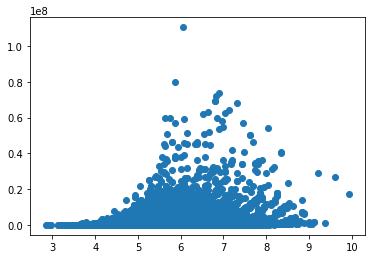

In [19]:
plt.scatter(data['star_x'], data['value'])

In [17]:
data['star_x'].corr(data['value'])

0.6785575278127004

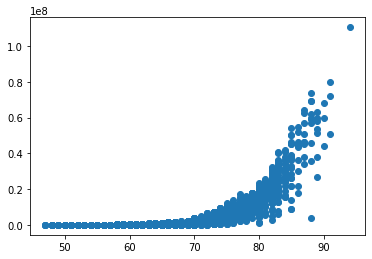

In [3]:
#이적료에 영향을 주는 변수가 뭐가 있을까

plt.scatter(data['stat_overall'], data['value'])

In [4]:
#상관관계 (강한 상관관계)

data['stat_overall'].corr(data['value'])

0.6584442587208492

In [5]:
#modeling하기 위해 변수 할당

x = ['stat_overall']

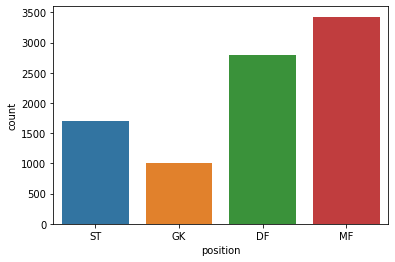

In [6]:
#'position'

sns.countplot(data['position'])

In [7]:
#list 'x'에 'position'추가

x.append('position')
x

['stat_overall', 'position']

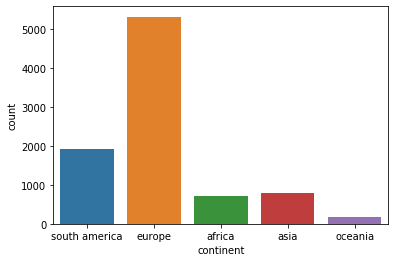

In [8]:
#'continent'

sns.countplot(data['continent'])

In [9]:
#random forest를 사용해서 'x'를 모델링

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
#n_estimators : 나뭇가지의 갯수를 의미합니다.

rf = RandomForestRegressor(n_estimators = 5)

In [12]:
#학습시키기(변수를 숫자형으로 바꿔준 후)

data['position'] = data['position'].map({'ST' : 0, 'GK' : 0, 'DF' : 1, 'MF' : 1})
data
rf.fit(data[x], data['value'])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)